# Bangladesh Economic Forecasting Model

Bangladesh is a country that stands at the forefront of economic growth and development, standing as a model for economic development among all third-world countries. In this notebook, I will examine and reason with the data collected involving Bangladesh's economic indicators from 1980 - 2019 and build a model that projects a forecast of some of these indicators.



In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading the Data

In [259]:
bd = pd.read_csv('Bangladesh ML Model/BD_economic_indicators.csv')
bd.rename(columns = {'GDP ': 'GDP'}, inplace = True)
copy = bd.copy()
def load_copy():
    copy = bd.copy()
bd

,Year,GDP,GDP per capita,GDP growth,Inflation rate,Unemployed rate,Government debt,Total Investment
0,1980,41.2,500,3.10%,15.40%,NaN,NaN,14.44%
1,1981,47.4,560,5.60%,14.50%,NaN,NaN,17.16%
2,1982,52.0,597,3.20%,12.90%,NaN,NaN,17.36%
3,1983,56.5,633,4.60%,9.50%,NaN,NaN,16.56%
4,1984,61.0,664,4.20%,10.40%,NaN,NaN,16.48%
5,1985,65.3,693,3.70%,10.50%,NaN,NaN,15.83%
6,1986,69.3,715,4.00%,10.20%,NaN,NaN,16.18%
7,1987,73.1,735,2.90%,10.80%,NaN,NaN,15.47%
8,1988,77.5,759,2.40%,9.70%,NaN,NaN,15.74%
9,1989,84.0,801,4.30%,8.70%,NaN,NaN,16.12%


In [70]:
bd.dtypes

Year                  int64
GDP                 float64
GDP per capita       object
GDP growth           object
Inflation rate       object
Unemployed rate      object
Government debt      object
Total Investment     object
dtype: object

# EDA

In [71]:
def turn_percent_to_num(col):
    if (col == None):
        return 0
    if type(col) != str:
        return col
    return float(col.split('%')[0])
bd['Inflation rate'] = bd['Inflation rate'].apply(turn_percent_to_num)
bd['Inflation rate']

0     15.4
1     14.5
2     12.9
3      9.5
4     10.4
5     10.5
6     10.2
7     10.8
8      9.7
9      8.7
10    10.5
11     8.3
12     3.6
13     3.0
14     6.2
15    10.1
16     2.5
17     5.0
18     8.6
19     6.2
20     2.5
21     1.9
22     3.7
23     5.4
24     6.1
25     7.0
26     6.8
27     9.1
28     8.9
29     4.9
30     9.4
31    11.5
32     6.2
33     7.5
34     7.0
35     6.2
36     5.7
37     5.6
38     5.6
39     5.5
Name: Inflation rate, dtype: float64

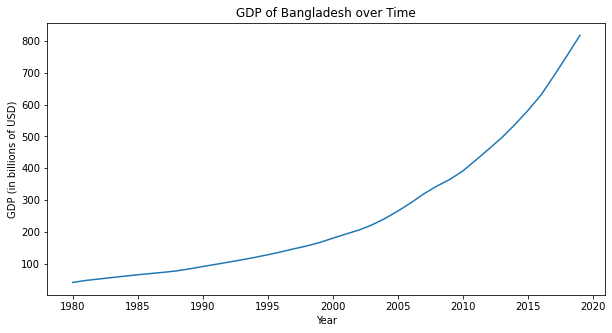

In [72]:
def graph(x, y, xlabel = None, ylabel = None, title = None):
    plt.figure(figsize = (10, 5))
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
graph(bd['Year'], bd['GDP'], 'Year', 'GDP (in billions of USD)', 'GDP of Bangladesh over Time')

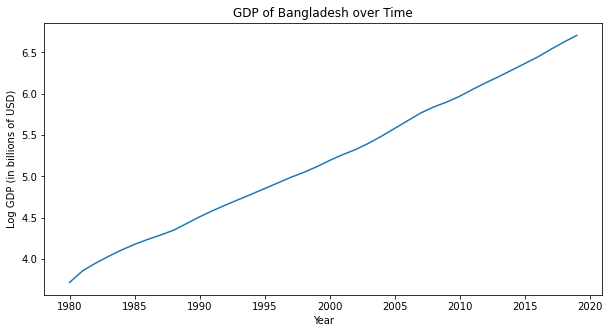

In [73]:
graph(bd['Year'], np.log(bd['GDP']), 'Year', 'Log GDP (in billions of USD)', 'GDP of Bangladesh over Time')

The forecast of GDP seems to follow a fairly straightforward schedule, going up at an exponential rate.

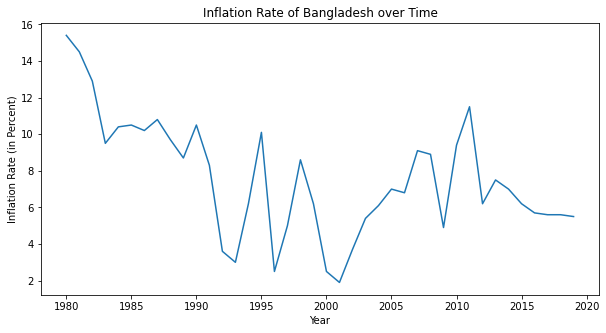

In [74]:
graph(bd['Year'], bd['Inflation rate'], 'Year', 'Inflation Rate (in Percent)',  'Inflation Rate of Bangladesh over Time')

In [75]:
bd['Total Investment'] = bd['Total Investment'].apply(turn_percent_to_num)

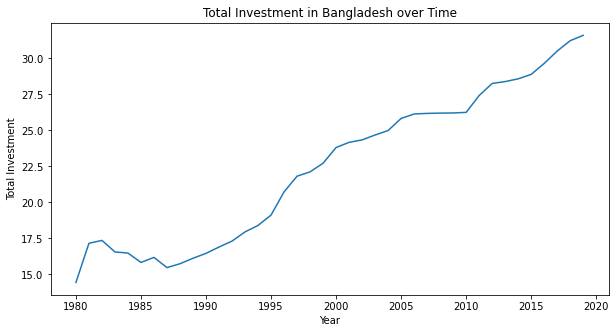

In [76]:
graph(bd['Year'], bd['Total Investment'], 'Year', 'Total Investment', 'Total Investment in Bangladesh over Time')

In [77]:
bd['GDP growth'] = bd['GDP growth'].apply(turn_percent_to_num)
bd['GDP growth']

0     3.1
1     5.6
2     3.2
3     4.6
4     4.2
5     3.7
6     4.0
7     2.9
8     2.4
9     4.3
10    4.6
11    4.2
12    4.8
13    4.3
14    4.5
15    4.8
16    5.0
17    5.3
18    5.0
19    5.4
20    5.6
21    4.8
22    4.8
23    5.8
24    6.1
25    6.3
26    6.9
27    6.5
28    5.5
29    5.3
30    6.0
31    6.5
32    6.3
33    6.0
34    6.3
35    6.8
36    7.2
37    7.6
38    7.9
39    8.1
Name: GDP growth, dtype: float64

Text(0.5, 1.0, 'GDP Growth of Bangladesh over Time')

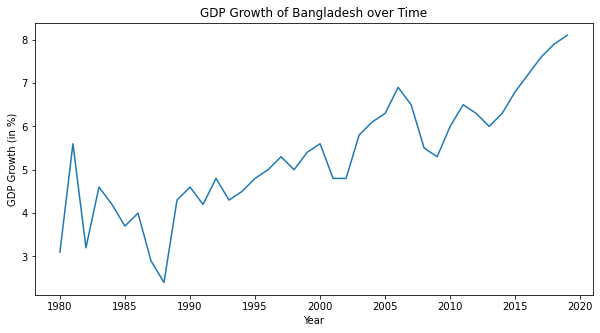

In [78]:
x = bd['Year']
y = bd['GDP growth']
plt.figure(figsize = (10, 5))
plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('GDP Growth (in %)')
plt.title('GDP Growth of Bangladesh over Time')

In [79]:
bd.drop(['Unemployed rate', 'Government debt'], axis = 1, inplace = True)

From this data, we also obtain the population of Bangladesh throughout this time.

In [80]:
bd['GDP'] = bd['GDP'] * 1000000000

In [81]:
bd.dtypes

Year                  int64
GDP                 float64
GDP per capita       object
GDP growth          float64
Inflation rate      float64
Total Investment    float64
dtype: object

In [82]:
type(bd['GDP per capita'].iloc[0])

str

In [83]:
def turn_to_float(col):
    return float(col.replace(',', ""))

In [84]:
bd['GDP per capita'] = bd['GDP per capita'].apply(turn_to_float)

In [85]:
bd['Population'] = bd['GDP'] / bd['GDP per capita']

In [86]:
bd['Population'] = bd['Population'] / 1000000

In [87]:
bd.rename(columns = {'Population': 'Population (in millions)'}, inplace = True)
bd['GDP'] = bd['GDP'] / 1000000000
bd

,Year,GDP,GDP per capita,GDP growth,Inflation rate,Total Investment,Population (in millions)
0,1980,41.2,500.0,3.1,15.4,14.44,82.400000
1,1981,47.4,560.0,5.6,14.5,17.16,84.642857
2,1982,52.0,597.0,3.2,12.9,17.36,87.102178
3,1983,56.5,633.0,4.6,9.5,16.56,89.257504
4,1984,61.0,664.0,4.2,10.4,16.48,91.867470
5,1985,65.3,693.0,3.7,10.5,15.83,94.227994
6,1986,69.3,715.0,4.0,10.2,16.18,96.923077
7,1987,73.1,735.0,2.9,10.8,15.47,99.455782
8,1988,77.5,759.0,2.4,9.7,15.74,102.108037
9,1989,84.0,801.0,4.3,8.7,16.12,104.868914


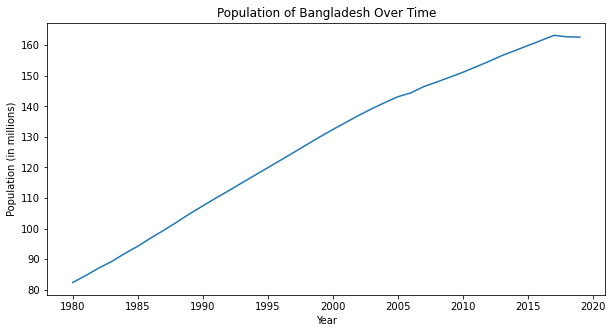

In [88]:
graph(bd['Year'], bd['Population (in millions)'], 'Year', 'Population (in millions)', 'Population of Bangladesh Over Time')

It seems as though Bangladesh has increased it's population at a constant rate from the 1980's until 2020, although it did go down from 2017 - 2019.

I decided to not examine the unemployment rate and government debt because there were too many missing values that I felt shouldn't be imputed because the values that were missing were from the beginning of the history of Bangladesh as a nation. Typically, as a country is developing, a lot of it's economic indicators fluctuate heavily so it would not be right to impute values as placeholders for these indicators. 

# Building the Forecasting Model

We will build a model to forecast the inflation rates of Bangladesh as it follows an unpredictable path and it's accuracy will really test the limits of our model. The other variable in contention for forecasting was GDP growth of Bangladesh but it seems to follow an easily identifiable upward trend from the human eye, which makes sense as Bangladesh is known to have one of the fastest-growing economies in the world. I chose an ARIMA model as it is the best equipped model for tackling time-series forecasting and it would easily be able to take inputs from yearly inflation rate data.

In [89]:
import datetime
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt

In [90]:
data = bd[['Year', 'Inflation rate']]
data

,Year,Inflation rate
0,1980,15.4
1,1981,14.5
2,1982,12.9
3,1983,9.5
4,1984,10.4
5,1985,10.5
6,1986,10.2
7,1987,10.8
8,1988,9.7
9,1989,8.7


In [91]:
data.index

RangeIndex(start=0, stop=40, step=1)

                               SARIMAX Results                                
Dep. Variable:         Inflation rate   No. Observations:                   40
Model:                 ARIMA(5, 0, 0)   Log Likelihood                 -87.818
Date:                Wed, 05 Jan 2022   AIC                            189.636
Time:                        01:23:01   BIC                            201.458
Sample:                             0   HQIC                           193.910
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4469      1.856      4.550      0.000       4.809      12.085
ar.L1          0.7283      0.158      4.607      0.000       0.418       1.038
ar.L2         -0.2773      0.226     -1.229      0.2

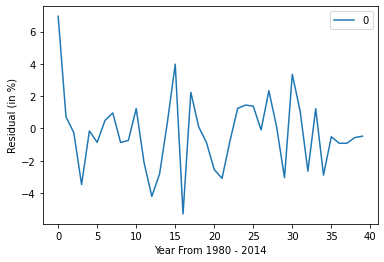

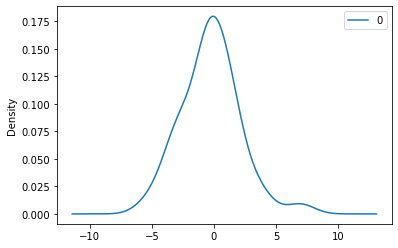

               0
count  40.000000
mean   -0.269884
std     2.327997
min    -5.291766
25%    -1.210327
50%    -0.365137
75%     1.124093
max     6.953090


In [245]:
# fit model
#data.index = data.index.to_period('Y')
model = ARIMA(data['Inflation rate'], order=(5,0,0))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# line plot of residuals
residuals = pd.DataFrame(fitted.resid)
residuals.plot()
plt.xlabel('Year From 1980 - 2014')
plt.ylabel('Residual (in %)')
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

The kde-plot of the residuals don't have the best normal distribution fit, showing a bit of skew and kurtosis.

# Measuring the Success of Our Model

predicted=10.400416, expected=7.000000
predicted=6.908322, expected=6.200000
predicted=7.176536, expected=5.700000
predicted=6.382141, expected=5.600000
predicted=6.423545, expected=5.600000
predicted=5.912494, expected=5.500000
Test RMSE: 1.618


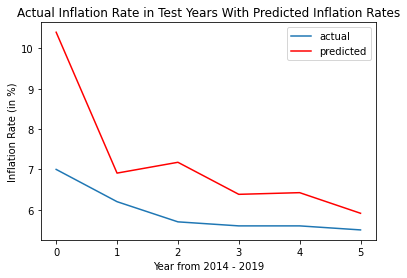

In [248]:
from sklearn.metrics import mean_squared_error
X = data['Inflation rate'].values
size = int(len(X) * 0.85)
train, test = X[0:size], X[size:len(X)]
train_list = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(train_list, order=(5, 0, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    train_list.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test, label = 'actual')
plt.plot(predictions, color='red', label = 'predicted')
plt.xlabel('Year from 2014 - 2019')
plt.ylabel('Inflation Rate (in %)')
plt.title('Actual Inflation Rate in Test Years With Predicted Inflation Rates')
plt.legend()
plt.show()

This model worked terribly on forecasting inflation rates so we will probably want to do some hyperparameter tuning in order to try and find a better order parameter for this model and lower our RMSE.

# Tuning the Model

The main parameter of an ARIMA model to tune is the order parameter, expressed as (p, d, q). P is the number of autoregressive terms, d is the number of nonseasonal differences needed for stationarity, and q is the number of lagged forecast errors in the prediction equation.

In [253]:
def find_best_params(data, p_num, d_num, q_num):
    data = data.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_num:
        for d in d_num:
            for q in q_num:
                order = (p, d, q)
                X = data.values
                size = int(len(X) * 0.85)
                train, test = X[0:size], X[size:len(X)]
                history = [x for x in train]
                predictions = list()
                for t in range(len(test)):
                    model = ARIMA(history, order= order, enforce_invertibility = False, enforce_stationarity = False)
                    model_fit = model.fit()
                    forecast = model_fit.forecast()
                    predictions.append(forecast[0])
                    history.append(test[t])
                rmse = np.sqrt(mean_squared_error(test, predictions))
                if rmse < best_score:
                    best_score, best_cfg = rmse, order
                print('ARIMA%s RMSE=%.3f' % (order, rmse))
    print('Best ARIMA: %s \nRMSE:%.3f' % (best_cfg, best_score))
    return best_cfg

In [254]:
find_best_params(data['Inflation rate'], [i for i in range(3)], [i for i in range(3)], [i for i in range(3)])

ARIMA(0, 0, 0) RMSE=1.679
ARIMA(0, 0, 1) RMSE=1.197
ARIMA(0, 0, 2) RMSE=1.056
ARIMA(0, 1, 0) RMSE=0.440
ARIMA(0, 1, 1) RMSE=0.859
ARIMA(0, 1, 2) RMSE=0.970
ARIMA(0, 2, 0) RMSE=0.775
ARIMA(0, 2, 1) RMSE=0.304
ARIMA(0, 2, 2) RMSE=1.128
ARIMA(1, 0, 0) RMSE=0.715
ARIMA(1, 0, 1) RMSE=0.955
ARIMA(1, 0, 2) RMSE=0.574
ARIMA(1, 1, 0) RMSE=0.463
ARIMA(1, 1, 1) RMSE=0.793
ARIMA(1, 1, 2) RMSE=1.019
ARIMA(1, 2, 0) RMSE=0.520
ARIMA(1, 2, 1) RMSE=0.322
ARIMA(1, 2, 2) RMSE=0.567
ARIMA(2, 0, 0) RMSE=0.733
ARIMA(2, 0, 1) RMSE=0.741
ARIMA(2, 0, 2) RMSE=0.705
ARIMA(2, 1, 0) RMSE=1.450
ARIMA(2, 1, 1) RMSE=1.434
ARIMA(2, 1, 2) RMSE=1.536
ARIMA(2, 2, 0) RMSE=1.994
ARIMA(2, 2, 1) RMSE=1.624
ARIMA(2, 2, 2) RMSE=1.618
Best ARIMA: (0, 2, 1) 
RMSE:0.304


(0, 2, 1)

predicted=7.260611, expected=7.000000
predicted=6.753008, expected=6.200000
predicted=5.937149, expected=5.700000
predicted=5.430572, expected=5.600000
predicted=5.335155, expected=5.600000
predicted=5.342109, expected=5.500000
Test RMSE: 0.304


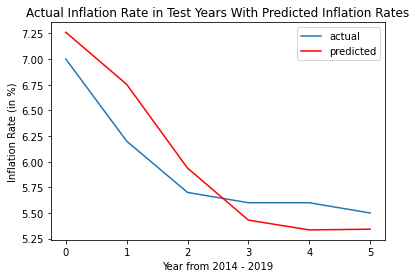

In [255]:
from sklearn.metrics import mean_squared_error
X = data['Inflation rate'].values
size = int(len(X) * 0.85)
train, test = X[0:size], X[size:len(X)]
train_list = [x for x in train]
predictions = []
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(train_list, order=(0, 2, 1))
    fitted = model.fit()
    output = fitted.forecast()
    predictions.append(output[0])
    train_list.append(test[t])
    print('predicted=%f, expected=%f' % (output[0], test[t]))
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test, label = 'actual')
plt.plot(predictions, color='red', label = 'predicted')
plt.legend()
plt.xlabel('Year from 2014 - 2019')
plt.ylabel('Inflation Rate (in %)')
plt.title('Actual Inflation Rate in Test Years With Predicted Inflation Rates')
plt.show()

# Summary

In summary, the best model that I could produce using an ARIMA model had a test-RMSE of 0.304 in a five-year forecast. It is also noteworthy to mention that this data runs all the way until 2019, exactly one year before the world was almost halted as a result of the COVID-19 pandemic. This data is not trained on the economic indicators affected by such a large phenomenon, so for the future, this data may be trained on data ranging in that time period, and when more time has passed, we can train and test a model that takes this event into account and forecasts a more accurate model.